# Actividad 4: k-means
---
Hugo Torricos

### Implementacion y visualizacion de k-means en 2D

Importacion de librerias y datos de entrada desde config.yaml

In [74]:
# Esto solo se corre como sugerencia de la libreria para evitar problemas con kmeans
import os
os.environ["OMP_NUM_THREADS"] = '2'

In [75]:
import yaml

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [76]:
file = open("config.yaml", "r")
yml = yaml.safe_load(file)
file.close()
yml

{'csv1': 'kmeans.1.csv', 'csv2': 'kmeans2.csv'}

Carga de base de datos kmeans1.csv

In [77]:
km1 = pd.read_csv(yml['csv1'])
km1 = pd.DataFrame(MinMaxScaler().fit_transform(km1), columns=km1.columns)

Visualizacion de A y B

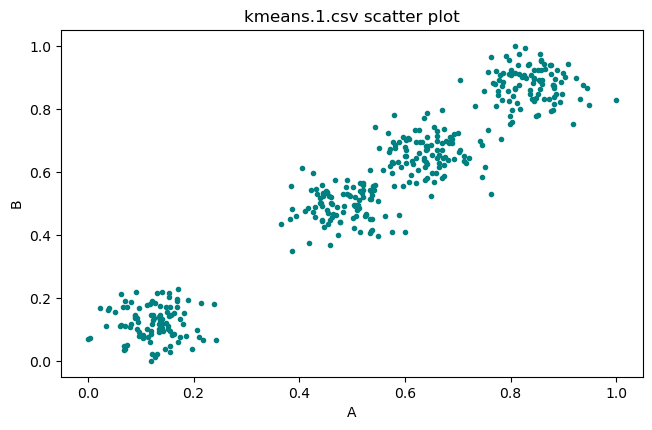

In [78]:
plt.figure(figsize=(7.5, 4.5))
plt.title(f'{yml['csv1']} scatter plot')
plt.xlabel('A')
plt.ylabel('B')
plt.scatter(km1['A'], km1['B'], marker='.', c= '#008080')
plt.show()

Aplicacion del algoritmo k-means, se obrservan los resultados

In [79]:
kmeans = KMeans(n_clusters=4).fit(km1)

In [80]:
kmeans.cluster_centers_

array([[0.64504777, 0.66137917],
       [0.12488096, 0.1225848 ],
       [0.48395258, 0.49330798],
       [0.83902637, 0.87789952]])

In [81]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3,

In [82]:
kmeans.inertia_

2.1761149778977487

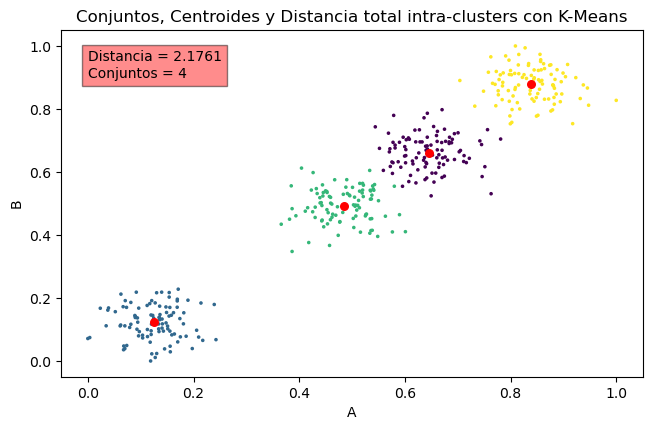

In [83]:
plt.figure(figsize=(7.5, 4.5))

plt.scatter(km1['A'], km1['B'], c=kmeans.labels_, marker='.', s=10)
plt.scatter([i[0] for i in kmeans.cluster_centers_], [i[1] for i in kmeans.cluster_centers_], marker='o', c="#ff0000", s=30)
plt.text(km1['A'].min(), 0.9*km1['B'].max(), f"Distancia = {kmeans.inertia_:.4f}\nConjuntos = {len(kmeans.cluster_centers_)}",
         fontsize=10, bbox=dict(facecolor='red', alpha=0.45))

plt.title('Conjuntos, Centroides y Distancia total intra-clusters con K-Means')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

*Tras aplicar el algoritmo, cluster_centers_ es un arreglo de los centroides de cada conjunto, inertia_ es el total de las distancias de los puntos a sus centroides y labels_ es un arreglo de los clusters a los cuales pertenece cada punto*

Ahora se aplica k-means modificando el numero de conjuntos en que se quiere agrupar los datos, las distancias intra-cluster se almacenan en un diccionario

In [84]:
distancias = {}
for i in range(10):
    kmeans = KMeans(n_clusters=i+1, random_state=0, init="random", n_init=7, max_iter=10).fit(km1)
    distancias[i] = kmeans.inertia_
distancias

{0: 60.00208300828672,
 1: 15.793568251801174,
 2: 4.777830629096789,
 3: 2.1764189748283718,
 4: 1.9671072046053548,
 5: 1.7837083212054354,
 6: 1.6270421441240286,
 7: 1.3672076921549905,
 8: 1.3535176986100548,
 9: 1.1932438443520612}

Se grafican las distancias obtenidas

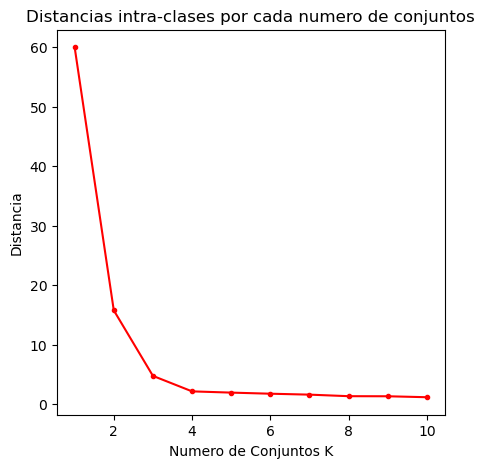

In [85]:
plt.figure(figsize=(5, 5))
plt.plot([_+1 for _ in distancias.keys()], [_ for _ in distancias.values()], marker='.', color='red')
plt.title('Distancias intra-clases por cada numero de conjuntos')
plt.xlabel('Numero de Conjuntos K')
plt.ylabel('Distancia')
plt.show()

*A partir del grafico, y de acuerdo al criterio del codo, se puede decir que el numero de conjuntos optimo es 3.*

### Analisis de clusters

Importacion de kmeans2.csv y aplicacion de k-means

In [101]:
km2 = pd.read_csv(yml['csv2'])
km2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129989 entries, 0 to 129988
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PAC_EDAD     129989 non-null  int64  
 1   SATO2        129989 non-null  float64
 2   TEMPERATURA  129989 non-null  float64
 3   GLASGOW      129989 non-null  float64
 4   EVA          129989 non-null  float64
 5   HGT          129989 non-null  float64
 6   FR           129989 non-null  float64
 7   DIAS_HOSP    129989 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 7.9 MB


In [102]:
km2.describe()

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
count,129989.000000,129989.000000,129989.000000,129989.000000,129989.000000,129989.000000,129989.000000,129989.000000
mean,29.640393,97.129665,36.749640,14.961189,3.825870,170.769234,18.480371,1.508397
std,26.265418,2.820980,0.661044,0.390000,1.836665,86.536655,3.641386,5.065411
min,0.000000,0.000000,34.000000,3.000000,1.000000,11.000000,3.000000,0.000000
25%,6.000000,97.000000,36.400000,15.000000,2.000000,109.000000,16.000000,1.000000
50%,22.000000,98.000000,36.700000,15.000000,4.000000,140.000000,18.000000,1.000000
75%,51.000000,98.000000,37.000000,15.000000,5.000000,210.000000,19.000000,1.000000
max,136.000000,100.000000,42.000000,15.000000,10.000000,599.000000,99.000000,208.000000


Se aplica zscore para procesar los datos.

In [103]:
def zscore(df):
    new = pd.DataFrame()
    for c in df.columns:
        new[c] = (df[c]-df[c].mean())/df[c].std()
    return new

In [104]:
km2z = zscore(km2)
km2z.describe()

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
count,1.299890e+05,1.299890e+05,1.299890e+05,1.299890e+05,1.299890e+05,1.299890e+05,1.299890e+05,1.299890e+05
mean,3.935647e-17,-1.938525e-15,-3.091232e-15,-5.280326e-16,5.422446e-17,-1.836635e-17,-1.924094e-17,1.049506e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.128495e+00,-3.443117e+01,-4.159540e+00,-3.066970e+01,-1.538587e+00,-1.846261e+00,-4.251230e+00,-2.977837e-01
25%,-9.000577e-01,-4.596443e-02,-5.289211e-01,9.951526e-02,-9.941224e-01,-7.137927e-01,-6.811613e-01,-1.003664e-01
50%,-2.908917e-01,3.085223e-01,-7.509383e-02,9.951526e-02,9.480777e-02,-3.555630e-01,-1.319199e-01,-1.003664e-01
75%,8.132217e-01,3.085223e-01,3.787335e-01,9.951526e-02,6.392728e-01,4.533428e-01,1.427008e-01,-1.003664e-01
max,4.049416e+00,1.017496e+00,7.942522e+00,9.951526e-02,3.361598e+00,4.948548e+00,2.211236e+01,4.076503e+01


In [105]:
kmeans2 = KMeans().fit(km2z)

A continuacion se determina el numero adecuado de clusters por medio de dos metodos: Regla del codo y Davis-Bouldin.

In [106]:
from sklearn.metrics import davies_bouldin_score

In [107]:
class reporte:
    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.distancias = {}
        self.davies = {}
        self.silhouette = {}

    def indices(self):
        for k in range(1, self.k):
            kmeans = KMeans(n_clusters=k+1, random_state=0).fit(self.data)
            self.distancias[k] = kmeans.inertia_
            self.davies[k] = davies_bouldin_score(self.data, kmeans.labels_)
            
    def codo(self):
        plt.figure(figsize=(5, 5))
        plt.plot([_+1 for _ in self.distancias.keys()], [_ for _ in self.distancias.values()], marker='.', color='red')
        plt.title('Distancias intra-clases por cada numero de conjuntos')
        plt.xlabel('Numero de Conjuntos K')
        plt.ylabel('Distancia')
        plt.show()
    
    def daviesBouldin(self):
        plt.figure(figsize=(5, 5))
        plt.plot([_+1 for _ in self.davies.keys()], [_ for _ in self.davies.values()], marker='.', color='green')
        plt.title('Indice Davies-Bouldin por cada numero de conjuntos')
        plt.xlabel('Numero de Conjuntos K')
        plt.ylabel('Distancia')
        plt.show()

In [108]:
r = reporte(km2z, k=30)
r.indices()

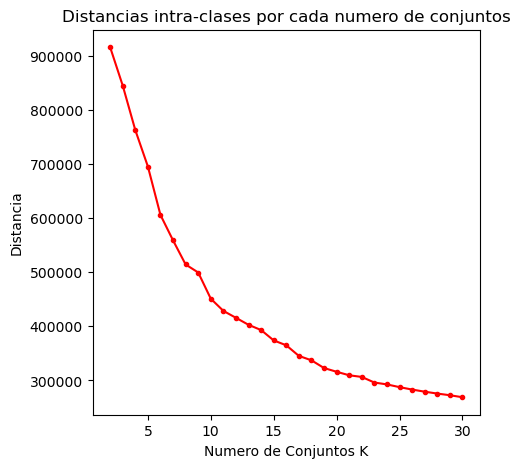

In [109]:
r.codo()

*Aplicando el criterio del codo el numero de clusters adecuado parece ser 10.*

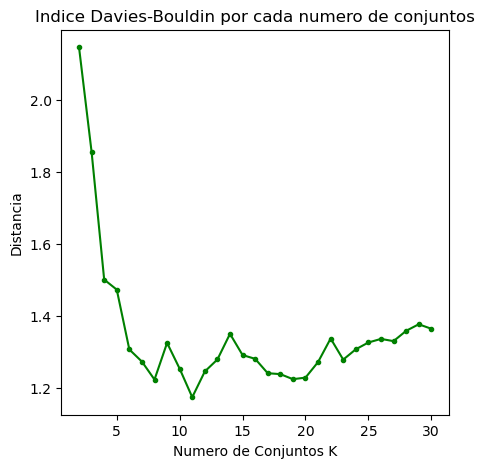

In [110]:
r.daviesBouldin()

*Con el metodo davies_bouldin es evidente que el mejor numero de clusters es, de hecho, 11.*

Ahora se buscara interpretar los resultados de los centroides. Primero se invierte la transforamcion z.

In [ ]:
def inverseZScore(og, centroids):
    df = pd.DataFrame(centroids, columns=og.columns)
    for c in df.columns:
        df[c] = df[c]*og[c].std() + og[c].mean()
    return df

In [144]:
kmeans2 = KMeans(n_clusters=11, random_state=0).fit(km2z)

In [ ]:
res = inverseZScore(km2, kmeans2.cluster_centers_)
res

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
0,60.895575,96.921670,36.505523,14.958884,2.817563,147.796052,17.288314,1.128160
1,61.242735,84.566382,36.724160,14.833618,4.033618,171.849573,20.762963,1.120228
2,16.027113,97.796278,36.667647,14.990598,5.258339,140.504545,17.537510,1.405064
3,59.196319,94.392638,36.631902,8.748466,4.423313,155.874233,19.858896,1.156442
4,24.609262,97.638205,36.584805,14.989870,4.334298,165.296671,17.424023,59.327062
5,13.322994,96.933761,38.328893,14.987383,3.346126,158.313847,19.228683,1.037535
6,8.557483,96.750143,36.956193,14.986095,4.377437,158.706135,29.017058,1.087013
7,40.226415,21.735660,36.496226,14.754717,4.132075,181.716981,23.603774,1.094340
8,10.522891,97.582608,36.639092,14.992535,2.210034,142.271025,18.194980,1.173582
9,60.323724,97.064390,36.526350,14.943445,6.092484,157.261354,17.642796,1.225854


Con la funcion analisis se generaran graficos a partir de los cuales se obtendra informacion sobre los centroides.

In [220]:
def analisis(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))
    fig.suptitle("Analisis de Centroides", fontsize=16)

    x = [_ for _ in range(11)]
    minmaxres = (df-df.min())/(df.max()-df.min())

    ax1.plot(x, minmaxres, marker = 'o', label = df.columns)
    ax1.set_xticks(x)
    ax1.legend(loc=6, fontsize=8)

    minmaxres.plot(ax=ax2, kind='bar', stacked=True)
    ax2.legend(loc=6, fontsize=8)  
    ax2.set_xlabel('Cluster al que pertenece el centroide') 

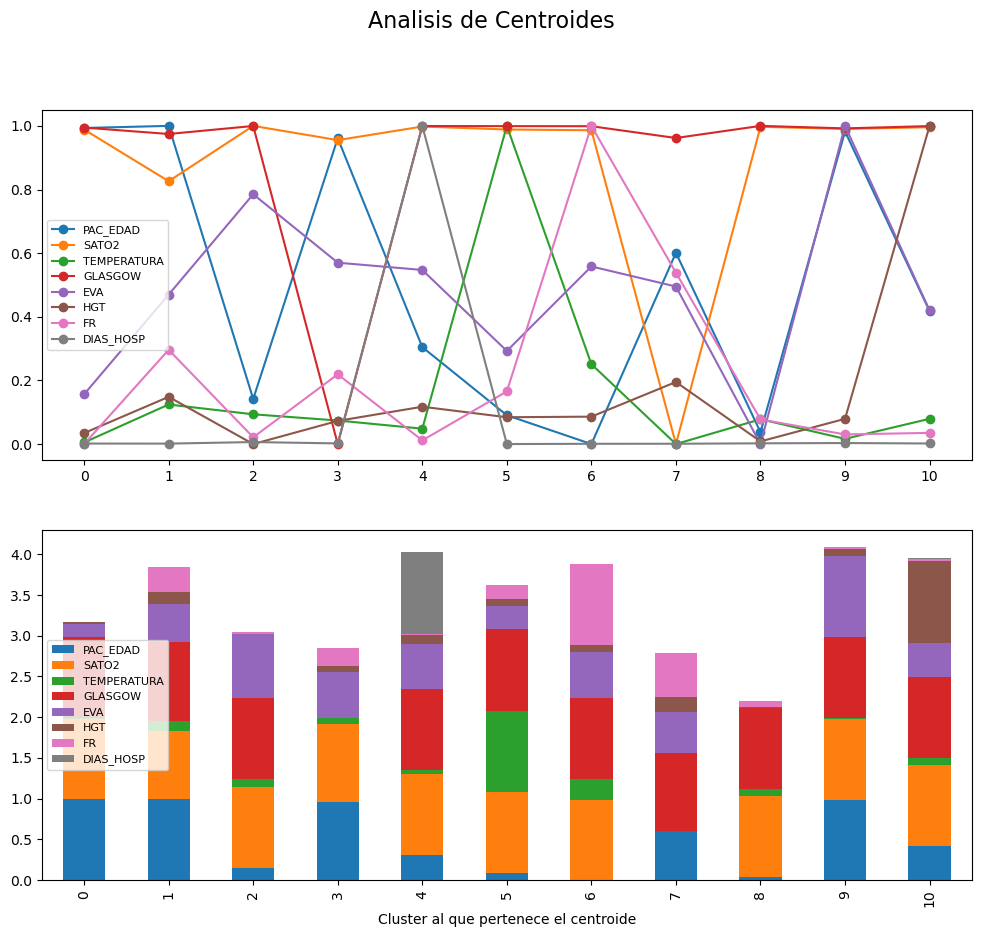

In [221]:
analisis(res)

*Para analizar los centroides decidi hacer graficos en los que se pueda ver qué valores de cada descriptor estan presentes en cada cluster. En ambos graficos, que realmente tratan de mostrar lo mismo, se puede ver que cada cluster contiene un grupo de valores anomalos de cada descriptor. Por ejemplo, en el 4 se encuetran los valores mas altos de DIAS_HOSP, mientras que en el 5 estan los mas altos de TEMPERATURA y en el 4 los mas bajos de GLASGOW.*

*Tambien cabe mencionar que para generar los graficos se realizo una transformacion minmax a los centroides y gracias a ello se puede analizar otro aspecto. La distribucion de los colores en cada cluster es unica, esto es bueno porque quiere decir que los clusters agrupan de buena forma la data.*

### Clase k-means

In [100]:
class algKMeans():
    def __init__(self):
        self.intra_cluster = 0
        self.inbetween_clusters = 0
        self.centroids = []
        self.tags = []
    def fit(self, df, k=6):
        pass
    def initialize_centroids():
        pass
    def assign_clusters():
        pass
    def update_centroids():
        pass
    def has_converged():
        pass